# Trabajo 1 AA2 Grupo 9


In [1]:
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
ATT_FILE =  f"https://drive.google.com/uc?export=download&id=1cM7VIgMsNPJQsyj8FYxkIE7EBqIYxWXv"
LABEL_FILE = f"https://drive.google.com/uc?export=download&id=1fFgrWJvnp0IHftWt1GCrV1NPRQl4Lqjk"


attributes = pd.read_csv(ATT_FILE)
label = pd.read_csv(LABEL_FILE)

In [3]:
attributes.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-0.52,0.322835,0.124088,-1.000000,-0.832512,0.462069,0.200000,-0.539823,0.200000,0.333333,...,-0.594595,-0.30,-0.66,0.152429,0.109983,0.50,0.111111,0.133501,0.200957,-1.0
1,-0.04,-0.223097,-0.717762,-0.984699,-0.965517,-0.586207,0.600000,-0.469027,0.600000,0.600000,...,-0.540541,0.94,0.74,0.346734,0.532995,0.50,0.555556,-0.435768,-0.698565,1.0
2,0.84,-0.128609,-0.669100,-0.949727,-0.940887,-0.544828,0.466667,-0.433628,0.600000,0.466667,...,-0.513514,0.94,0.54,0.082077,0.302876,0.75,0.333333,-0.350126,-0.598086,1.0
3,0.28,-0.013123,0.065693,-1.000000,-0.802956,0.820690,0.600000,-0.345133,0.333333,1.000000,...,-0.216216,-0.08,-0.30,0.192630,0.174281,-0.75,-0.777778,0.057935,0.105263,-1.0
4,0.12,-0.160105,-0.177616,-1.000000,-0.763547,0.889655,1.000000,-0.575221,0.600000,0.733333,...,-0.513514,0.12,-0.12,0.098827,0.106599,0.75,0.111111,-0.148615,-0.124402,-1.0


In [4]:
label.head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


In [5]:
TRAIN_RATE=0.8
n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train+n_dev]
t_dev = label.values[n_train:n_train+n_dev]

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

x_train: (31659, 21)
t_train: (31659, 1)
x_dev: (3957, 21)
t_dev: (3957, 1)


In [6]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))

In [7]:
x_train[:5]

array([[-0.52      ,  0.32283465,  0.12408759, -1.        , -0.83251232,
         0.46206897,  0.2       , -0.53982301,  0.2       ,  0.33333333,
        -0.38461538, -0.59459459, -0.3       , -0.66      ,  0.15242881,
         0.10998308,  0.5       ,  0.11111111,  0.13350126,  0.20095694,
        -1.        ],
       [-0.04      , -0.22309711, -0.71776156, -0.98469945, -0.96551724,
        -0.5862069 ,  0.6       , -0.46902655,  0.6       ,  0.6       ,
        -0.78461538, -0.54054054,  0.94      ,  0.74      ,  0.34673367,
         0.53299492,  0.5       ,  0.55555556, -0.43576826, -0.69856459,
         1.        ],
       [ 0.84      , -0.12860892, -0.66909976, -0.94972678, -0.9408867 ,
        -0.54482759,  0.46666667, -0.43362832,  0.6       ,  0.46666667,
        -0.78461538, -0.51351351,  0.94      ,  0.54      ,  0.08207705,
         0.30287648,  0.75      ,  0.33333333, -0.35012594, -0.59808612,
         1.        ],
       [ 0.28      , -0.01312336,  0.06569343, -1.        

In [8]:
t_train[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [9]:
x_dev[:5]

array([[-0.2       ,  0.3648294 ,  0.23114355, -1.        , -0.65517241,
         0.36551724,  0.46666667, -0.61061947,  0.46666667,  0.46666667,
        -0.44615385, -0.59459459,  0.12      , -0.66      ,  0.18927973,
         0.23857868,  0.75      ,  0.33333333,  0.03274559,  0.22009569,
        -1.        ],
       [ 0.52      , -0.24934383, -0.61557178, -1.        , -0.87684729,
        -0.47586207,  0.06666667,  0.45132743,  0.73333333,  0.46666667,
        -0.10769231, -0.35135135, -0.16      ,  0.52      ,  0.16917923,
         0.29949239, -0.25      ,  0.55555556, -0.44080605, -0.62200957,
        -1.        ],
       [-0.28      ,  0.09186352,  0.31873479, -1.        , -0.85714286,
         0.39310345, -0.6       ,  0.22123894, -0.6       , -0.6       ,
         0.66153846,  0.13513514,  0.16      , -0.5       , -0.15577889,
        -0.17089679, -0.5       , -0.55555556,  0.04785894,  0.32057416,
        -1.        ],
       [-0.68      , -0.21259843, -0.62530414, -1.        

In [10]:
t_dev[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU,Activation, ELU
from tensorflow.keras.activations import gelu
from tensorflow.keras.activations import tanh, relu, sigmoid
from tensorflow.keras.optimizers import Nadam

# MODELO 0

In [12]:
n_epochs = 100
lr = 0.01
n_neurons_per_hlayer = [20]

In [13]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer

In [14]:
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons, activation= 'sigmoid')(x)


# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
model = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = model.fit(x_train, t_train,
                    epochs=n_epochs,
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Epoch 1/100
990/990 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7338 - loss: 0.4941 - val_accuracy: 0.8365 - val_loss: 0.3612
Epoch 2/100
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8400 - loss: 0.3588 - val_accuracy: 0.8436 - val_loss: 0.3517
Epoch 3/100
990/990 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8445 - loss: 0.3504 - val_accuracy: 0.8453 - val_loss: 0.3492
Epoch 4/100
990/990 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8465 - loss: 0.3485 - val_accuracy: 0.8443 - val_loss: 0.3474
Epoch 5/100
990/990 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8466 - loss: 0.3465 - val_accuracy: 0.8466 - val_loss: 0.3467
Epoch 6/100
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8504 - loss: 0.3441 - val_accuracy: 0.8466 - val_loss: 0.3449
Epoch 7/100
990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8488 - loss: 0.3454 - val_accuracy: 0.8466 - val_loss: 0.3447
Epoch 8/100
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8506 - loss: 0.3422 - val_accu

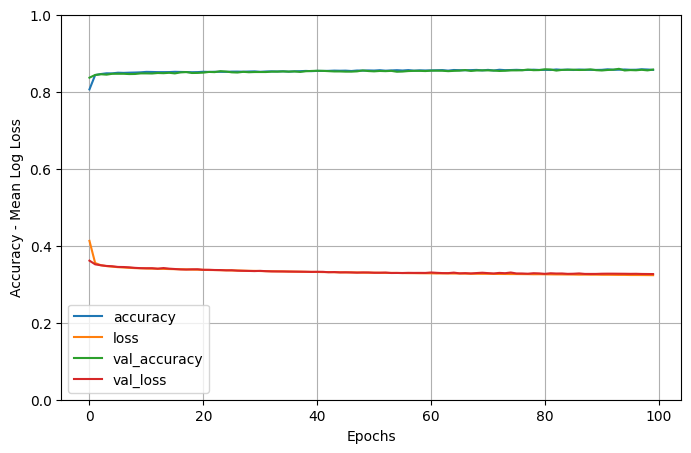

In [16]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [17]:
history.params

{'verbose': 'auto', 'epochs': 100, 'steps': 990}

In [18]:
results[-1:]

,accuracy,loss,val_accuracy,val_loss
99,0.856786,0.323507,0.857468,0.326384


# Modelo inicial:


In [19]:
n_epochs = 500
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [ 500, 250, 150, 75, 25]

In [20]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer

In [21]:
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons)(x)  # Sin activación aquí
    x = Activation(tanh)(x)

# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
model = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=lr),
              loss='binary_crossentropy',  # Cambio aquí
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,151 (731.06 KB)

 Trainable params: 187,151 (731.06 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8134 - loss: 0.4167 - val_accuracy: 0.8405 - val_loss: 0.3518
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8480 - loss: 0.3524 - val_accuracy: 0.8443 - val_loss: 0.3446
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8500 - loss: 0.3425 - val_accuracy: 0.8431 - val_loss: 0.3442
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8539 - loss: 0.3357 - val_accuracy: 0.8438 - val_loss: 0.3557
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8501 - loss: 0.3399 - val_accuracy: 0.8532 - val_loss: 0.3389
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8496 - loss: 0.3400 - val_accuracy: 0.8489 - val_loss: 0.3355
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8499 - loss: 0.3376 - val_accuracy: 0.8486 - val_loss: 0.3379
Epoch 8/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8567 - loss: 0.3268 - val_accuracy: 0.8494 - 

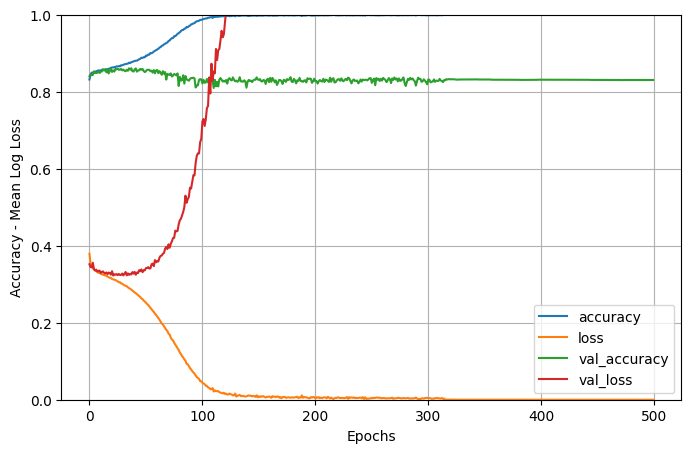

In [23]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [24]:
history.params

{'verbose': 'auto', 'epochs': 500, 'steps': 62}

In [25]:
results[-1:]

,accuracy,loss,val_accuracy,val_loss
499,1.0,0.000005,0.830427,1.958539


# Inicial + L2

In [26]:
n_epochs = 500
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [ 500, 250, 150, 75, 25]

In [27]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer
# Regularizador L2 muy pequeño
l2_regularizer = l2(0.001)

# Capas ocultas con tanh, L2 regularización y Dropout
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons, kernel_regularizer = l2_regularizer)(x)  # Sin activación aquí
    x = Activation(tanh)(x)  # Activación tanh

# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
model = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=lr),
              loss='binary_crossentropy',  # Cambio aquí
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,151 (731.06 KB)

 Trainable params: 187,151 (731.06 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8239 - loss: 1.0552 - val_accuracy: 0.8481 - val_loss: 0.8028
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8428 - loss: 0.7553 - val_accuracy: 0.8337 - val_loss: 0.6329
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8451 - loss: 0.5885 - val_accuracy: 0.8423 - val_loss: 0.5110
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8462 - loss: 0.4888 - val_accuracy: 0.8471 - val_loss: 0.4469
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8493 - loss: 0.4323 - val_accuracy: 0.8421 - val_loss: 0.4108
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.3993 - val_accuracy: 0.8479 - val_loss: 0.3855
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8533 - loss: 0.3787 - val_accuracy: 0.8466 - val_loss: 0.3751
Epoch 8/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8506 - loss: 0.3709 - val_accuracy: 0.8481 - 

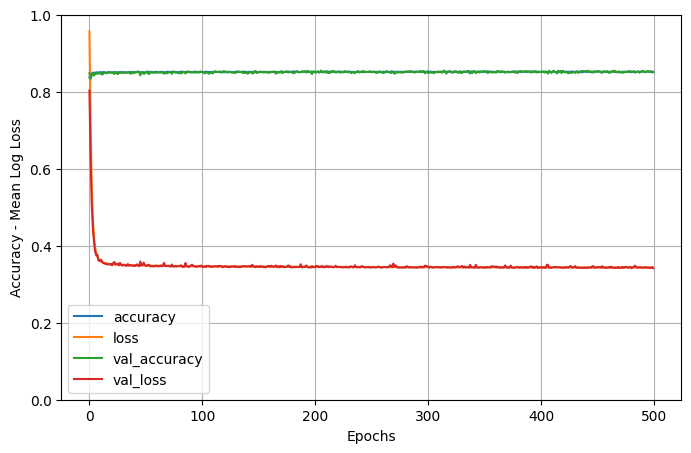

In [29]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [30]:
history.params

{'verbose': 'auto', 'epochs': 500, 'steps': 62}

In [31]:
results[-1:]

,accuracy,loss,val_accuracy,val_loss
499,0.851859,0.343251,0.850897,0.341696


# Inicial L2 + Early Stopping

In [32]:
n_epochs = 500
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [ 500, 250, 150, 75, 25]

In [33]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [34]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer

# Regularizador L2 muy pequeño
l2_regularizer = l2(0.001)

# Capas ocultas con tanh, L2 regularización y Dropout
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons, kernel_regularizer = l2_regularizer)(x)  # Sin activación aquí
    x = Activation(tanh)(x)  # Activación tanh

# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
model = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=lr),
              loss='binary_crossentropy',  # Cambio aquí
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 500)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,151 (731.06 KB)

 Trainable params: 187,151 (731.06 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    callbacks=[early_stopping],
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7994 - loss: 1.0643 - val_accuracy: 0.8375 - val_loss: 0.8206
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8444 - loss: 0.7678 - val_accuracy: 0.8469 - val_loss: 0.6218
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8484 - loss: 0.5914 - val_accuracy: 0.8458 - val_loss: 0.5112
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8498 - loss: 0.4905 - val_accuracy: 0.8501 - val_loss: 0.4501
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8475 - loss: 0.4386 - val_accuracy: 0.8489 - val_loss: 0.4058
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8507 - loss: 0.4026 - val_accuracy: 0.8479 - val_loss: 0.3921
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8508 - loss: 0.3835 - val_accuracy: 0.8491 - val_loss: 0.3739
Epoch 8/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8520 - loss: 0.3723 - val_accuracy: 0.8499 - 

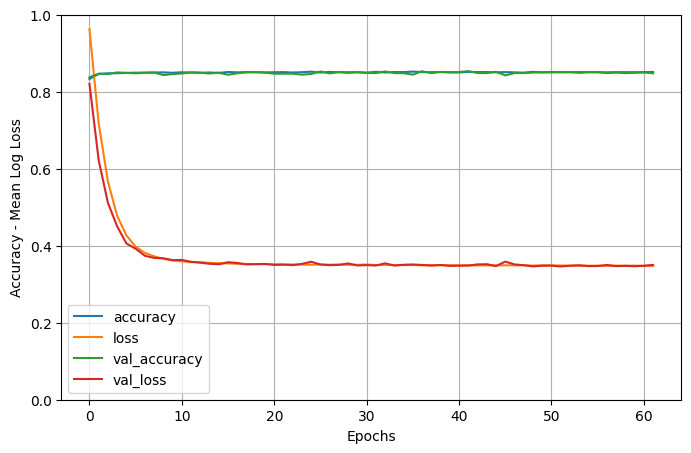

In [36]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [37]:
history.params

{'verbose': 'auto', 'epochs': 500, 'steps': 62}

In [38]:
results[-1:]

,accuracy,loss,val_accuracy,val_loss
61,0.851227,0.347735,0.847865,0.350146


# Modelo Inicial L2 mas moderado + Early Stopping

In [39]:
n_epochs = 500
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [ 500, 250, 150, 75, 25]

In [40]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [41]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer

# Regularizador L2 muy pequeño
l2_regularizer = l2(0.00001)

# Capas ocultas con tanh, L2 regularización y Dropout
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons, kernel_regularizer = l2_regularizer)(x)  # Sin activación aquí
    x = Activation(tanh)(x)  # Activación tanh

# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
model = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=lr),
              loss='binary_crossentropy',  # Cambio aquí
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 500)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,151 (731.06 KB)

 Trainable params: 187,151 (731.06 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    callbacks=[early_stopping],
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.8117 - loss: 0.4256 - val_accuracy: 0.8453 - val_loss: 0.3566
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8456 - loss: 0.3559 - val_accuracy: 0.8474 - val_loss: 0.3466
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8460 - loss: 0.3556 - val_accuracy: 0.8504 - val_loss: 0.3504
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8500 - loss: 0.3449 - val_accuracy: 0.8491 - val_loss: 0.3566
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8548 - loss: 0.3391 - val_accuracy: 0.8456 - val_loss: 0.3496
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8483 - loss: 0.3435 - val_accuracy: 0.8466 - val_loss: 0.3475
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8559 - loss: 0.3364 - val_accuracy: 0.8529 - val_loss: 0.3394
Epoch 8/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8548 - loss: 0.3341 - val_accuracy: 0.8509 - 

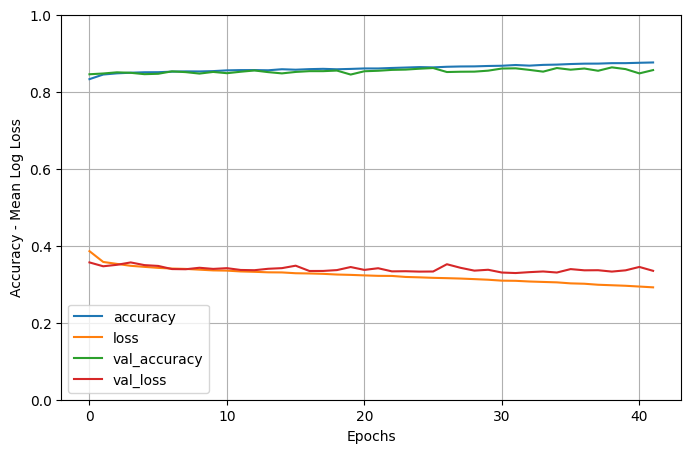

In [43]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [44]:
history.params

{'verbose': 'auto', 'epochs': 500, 'steps': 62}

In [45]:
results[-1:]

,accuracy,loss,val_accuracy,val_loss
41,0.875991,0.291901,0.856204,0.334774


# Modelo L2 moderado + Early Stopping + LR scheduler

In [46]:
n_epochs = 500
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [ 500, 250, 150, 75, 25]

In [47]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [48]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer

# Regularizador L2 muy pequeño
l2_regularizer = l2(0.00001)

# Capas ocultas con tanh, L2 regularización y Dropout
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons, kernel_regularizer = l2_regularizer)(x)  # Sin activación aquí
    x = Activation(tanh)(x)  # Activación tanh

# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
model = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=lr),
              loss='binary_crossentropy',  # Cambio aquí
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 500)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,151 (731.06 KB)

 Trainable params: 187,151 (731.06 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    callbacks=[early_stopping, lr_schedule],
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8028 - loss: 0.4264 - val_accuracy: 0.8486 - val_loss: 0.3567 - learning_rate: 0.0010
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8445 - loss: 0.3611 - val_accuracy: 0.8443 - val_loss: 0.3501 - learning_rate: 0.0010
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8474 - loss: 0.3535 - val_accuracy: 0.8415 - val_loss: 0.3483 - learning_rate: 0.0010
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8515 - loss: 0.3485 - val_accuracy: 0.8433 - val_loss: 0.3513 - learning_rate: 0.0010
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8502 - loss: 0.3492 - val_accuracy: 0.8509 - val_loss: 0.3416 - learning_rate: 0.0010
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8535 - loss: 0.3403 - val_accuracy: 0.8491 - val_loss: 0.3427 - learning_rate: 0.0010
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8559 - loss: 0.3371 - val_ac

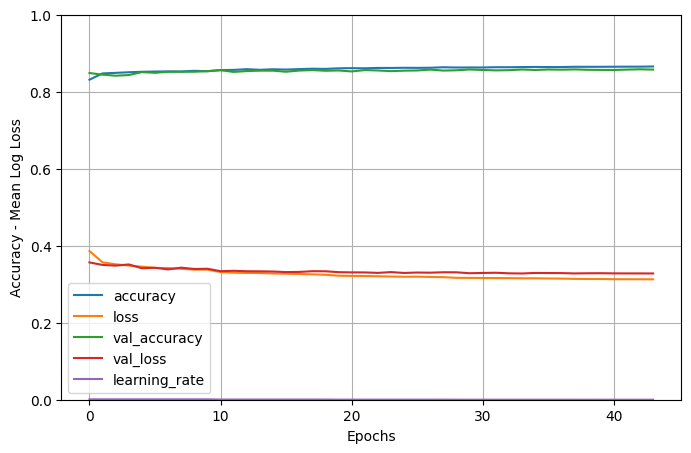

In [50]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [51]:
history.params

{'verbose': 'auto', 'epochs': 500, 'steps': 62}

In [52]:
results[-1:]

,accuracy,loss,val_accuracy,val_loss,learning_rate
43,0.865567,0.312636,0.857468,0.327939,0.000016


# Modelo anterior cambiando el optimizador (RMSProp a Nadam)

In [53]:
n_epochs = 500
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [ 500, 250, 150, 75, 25]

In [54]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [55]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer

# Regularizador L2 muy pequeño
l2_regularizer = l2(0.00001)

# Capas ocultas con tanh, L2 regularización y Dropout
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons, kernel_regularizer = l2_regularizer)(x)  # Sin activación aquí
    x = Activation(tanh)(x)  # Activación tanh

# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
model = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=lr),
              loss='binary_crossentropy',  # Cambio aquí
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 500)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,151 (731.06 KB)

 Trainable params: 187,151 (731.06 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    callbacks=[ early_stopping, lr_schedule],
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8295 - loss: 0.4023 - val_accuracy: 0.8484 - val_loss: 0.3514 - learning_rate: 0.0010
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8531 - loss: 0.3457 - val_accuracy: 0.8511 - val_loss: 0.3435 - learning_rate: 0.0010
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8509 - loss: 0.3469 - val_accuracy: 0.8519 - val_loss: 0.3412 - learning_rate: 0.0010
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8542 - loss: 0.3412 - val_accuracy: 0.8471 - val_loss: 0.3427 - learning_rate: 0.0010
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8554 - loss: 0.3394 - val_accuracy: 0.8491 - val_loss: 0.3374 - learning_rate: 0.0010
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8541 - loss: 0.3356 - val_accuracy: 0.8511 - val_loss: 0.3376 - learning_rate: 0.0010
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8536 - loss: 0.3390 - val_a

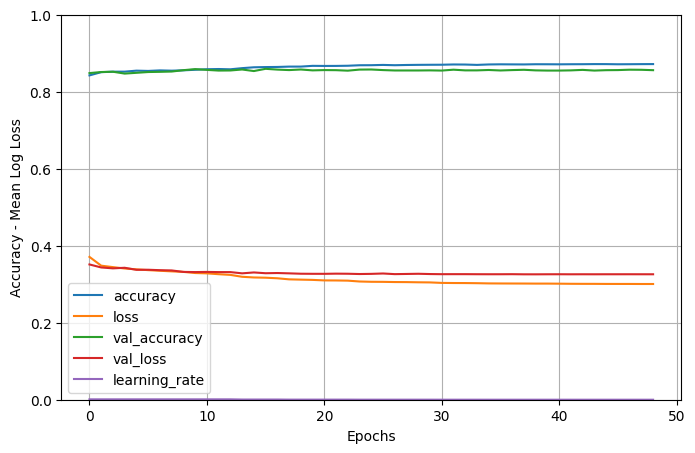

In [57]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [58]:
history.params

{'verbose': 'auto', 'epochs': 500, 'steps': 62}

In [59]:
results[-1:]

,accuracy,loss,val_accuracy,val_loss,learning_rate
48,0.87179,0.300575,0.855951,0.325841,0.000004


# Modelo con RELU (afrontar desvanecimiento del gradiente)

In [60]:
n_epochs = 500
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [ 500, 250, 150, 75, 25]

In [61]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [62]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer

# Regularizador L2 muy pequeño
l2_regularizer = l2(0.00001)

# Capas ocultas con tanh, L2 regularización y Dropout
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons, kernel_regularizer = l2_regularizer)(x)  # Sin activación aquí
    x = Activation(relu)(x) # Activación RELU

# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
model = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=lr),
              loss='binary_crossentropy',  # Cambio aquí
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 500)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_30 (Activation)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_32 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_33 (Activation)           │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_34 (Activation)           │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,151 (731.06 KB)

 Trainable params: 187,151 (731.06 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    callbacks=[ early_stopping, lr_schedule],
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.8057 - loss: 0.4477 - val_accuracy: 0.8496 - val_loss: 0.3446 - learning_rate: 0.0010
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8562 - loss: 0.3358 - val_accuracy: 0.8514 - val_loss: 0.3413 - learning_rate: 0.0010
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8510 - loss: 0.3397 - val_accuracy: 0.8539 - val_loss: 0.3326 - learning_rate: 0.0010
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8587 - loss: 0.3233 - val_accuracy: 0.8542 - val_loss: 0.3316 - learning_rate: 0.0010
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8592 - loss: 0.3255 - val_accuracy: 0.8544 - val_loss: 0.3320 - learning_rate: 0.0010
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3207 - val_accuracy: 0.8575 - val_loss: 0.3287 - learning_rate: 0.0010
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8614 - loss: 0.3192 - val_ac

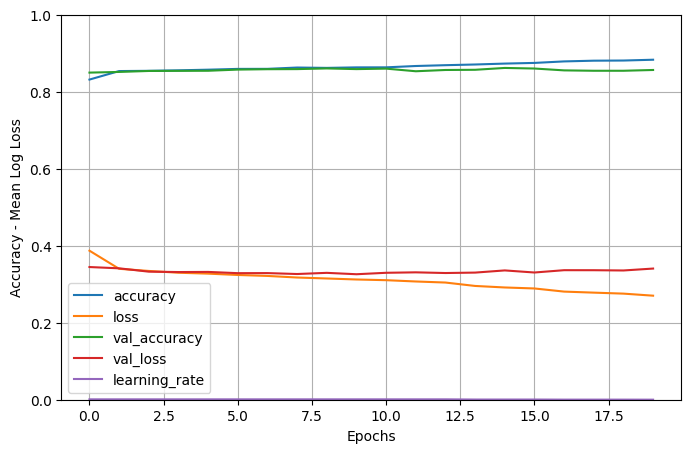

In [64]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [65]:
history.params

{'verbose': 'auto', 'epochs': 500, 'steps': 62}

In [66]:
results[-1:]

,accuracy,loss,val_accuracy,val_loss,learning_rate
19,0.883098,0.270245,0.856457,0.340673,0.000125


# Modelo anterior Aumentado el coeficiente de regularizacion l2

In [67]:
n_epochs = 500
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [ 500, 250, 150, 75, 25]

In [68]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [69]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer

# Regularizador L2 mas grande
l2_regularizer = l2(0.001)

# Capas ocultas con tanh, L2 regularización y Dropout
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons, kernel_regularizer = l2_regularizer)(x)  # Sin activación aquí
    x = Activation(relu)(x) # Activación RELU

# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
model = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=lr),
              loss='binary_crossentropy',  # Cambio aquí
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 500)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_35 (Activation)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_36 (Activation)           │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_37 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_38 (Activation)           │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_39 (Activation)           │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,151 (731.06 KB)

 Trainable params: 187,151 (731.06 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    callbacks=[ early_stopping, lr_schedule],
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.8089 - loss: 1.0171 - val_accuracy: 0.8486 - val_loss: 0.6385 - learning_rate: 0.0010
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8471 - loss: 0.5932 - val_accuracy: 0.8458 - val_loss: 0.4984 - learning_rate: 0.0010
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8513 - loss: 0.4798 - val_accuracy: 0.8532 - val_loss: 0.4383 - learning_rate: 0.0010
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8533 - loss: 0.4295 - val_accuracy: 0.8474 - val_loss: 0.4144 - learning_rate: 0.0010
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8545 - loss: 0.4062 - val_accuracy: 0.8504 - val_loss: 0.4033 - learning_rate: 0.0010
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8563 - loss: 0.3877 - val_accuracy: 0.8544 - val_loss: 0.3882 - learning_rate: 0.0010
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8561 - loss: 0.3799 - val_ac

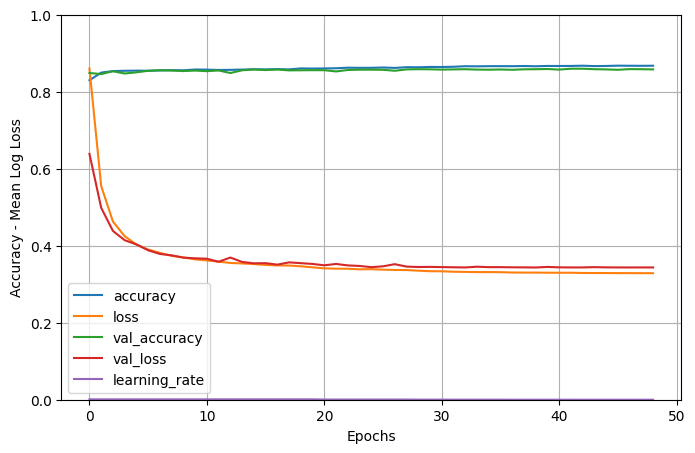

In [71]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [72]:
history.params

{'verbose': 'auto', 'epochs': 500, 'steps': 62}

In [73]:
results[-1:]

,accuracy,loss,val_accuracy,val_loss,learning_rate
48,0.867526,0.328557,0.857973,0.343574,0.000008


# Modelo anterior cambiando el regularizador l2 por un dropout

In [74]:
n_epochs = 500
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [ 500, 250, 150, 75, 25]

In [75]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [76]:
input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer

# Regularizador dropout
dropout_rate = 0.2

# Capas ocultas con tanh, L2 regularización y Dropout
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons)(x)  # Sin activación aquí
    x = Activation(relu)(x) # Activación RELU
    x = Dropout(dropout_rate)(x)  # Dropout después de la activación

# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
model = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=lr),
              loss='binary_crossentropy',  # Cambio aquí
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 500)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_40 (Activation)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_41 (Activation)           │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_42 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_43 (Activation)           │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_44 (Activation)           │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,151 (731.06 KB)

 Trainable params: 187,151 (731.06 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    callbacks=[ early_stopping, lr_schedule],
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.7797 - loss: 0.4764 - val_accuracy: 0.8471 - val_loss: 0.3464 - learning_rate: 0.0010
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8463 - loss: 0.3550 - val_accuracy: 0.8517 - val_loss: 0.3350 - learning_rate: 0.0010
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8518 - loss: 0.3404 - val_accuracy: 0.8522 - val_loss: 0.3309 - learning_rate: 0.0010
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8534 - loss: 0.3368 - val_accuracy: 0.8547 - val_loss: 0.3303 - learning_rate: 0.0010
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8512 - loss: 0.3351 - val_accuracy: 0.8565 - val_loss: 0.3268 - learning_rate: 0.0010
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8569 - loss: 0.3234 - val_accuracy: 0.8537 - val_loss: 0.3244 - learning_rate: 0.0010
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8569 - loss: 0.3323 - val_a

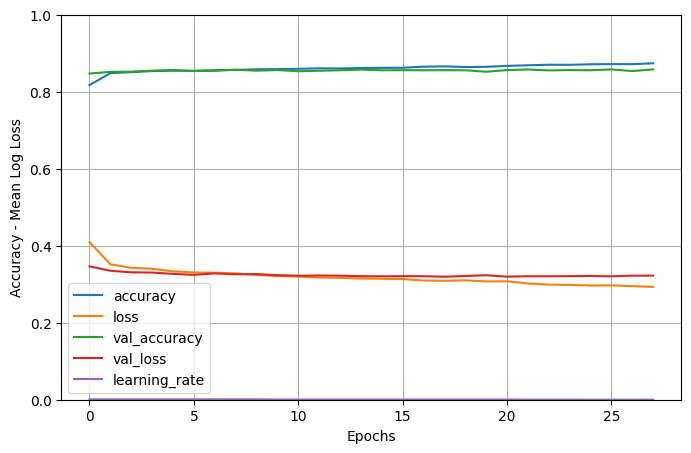

In [78]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [79]:
history.params

{'verbose': 'auto', 'epochs': 500, 'steps': 62}

In [80]:
results[-1:]

,accuracy,loss,val_accuracy,val_loss,learning_rate
27,0.873812,0.292931,0.857973,0.322324,0.000063


# Evaluacion modelo final:

In [88]:
n_final_test = n_instances-n_train-n_dev

x_final_test = attributes.values[n_train+n_dev:n_instances]
t_final_test = label.values[n_train+n_dev:n_instances]

print ("x_test:",x_final_test.shape)
print ("t_test:",t_final_test.shape)

x_test: (3958, 21)
t_test: (3958, 1)


In [89]:
# Modelo final con relu y l2 grande
n_epochs = 500
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [ 500, 250, 150, 75, 25]
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

input_layer = keras.layers.Input(shape=(INPUTS,))
x = input_layer

# Regularizador L2 mas grande
l2_regularizer = l2(0.001)

# Capas ocultas con tanh, L2 regularización y Dropout
for neurons in n_neurons_per_hlayer:
    x = Dense(units=neurons, kernel_regularizer = l2_regularizer)(x)  # Sin activación aquí
    x = Activation(relu)(x) # Activación RELU

# Capa de salida (Binaria → `sigmoid`)
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

# Definir modelo
modelo_final = keras.models.Model(input_layer, output_layer, name='BinaryClassifier')

# Compilar modelo
modelo_final.compile(optimizer=keras.optimizers.Nadam(learning_rate=lr),
              loss='binary_crossentropy',  # Cambio aquí
              metrics=['accuracy'])

# Resumen del modelo
modelo_final.summary()
import time

start = time.perf_counter()

# Asegurar que las etiquetas son de tipo float y en formato binario (0 o 1)
t_train = t_train.astype("float32")
t_dev = t_dev.astype("float32")

# Entrenar el modelo
history = modelo_final.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    callbacks=[ early_stopping, lr_schedule],
                    validation_data=(x_dev, t_dev))

print(time.perf_counter() - start)

Model: "BinaryClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 500)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_45 (Activation)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_46 (Activation)           │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_47 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_48 (Activation)           │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_49 (Activation)           │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,151 (731.06 KB)

 Trainable params: 187,151 (731.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7689 - loss: 1.0607 - val_accuracy: 0.8458 - val_loss: 0.6506 - learning_rate: 0.0010
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8513 - loss: 0.6019 - val_accuracy: 0.8504 - val_loss: 0.5055 - learning_rate: 0.0010
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8544 - loss: 0.4814 - val_accuracy: 0.8489 - val_loss: 0.4432 - learning_rate: 0.0010
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8568 - loss: 0.4342 - val_accuracy: 0.8522 - val_loss: 0.4171 - learning_rate: 0.0010
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8572 - loss: 0.4088 - val_accuracy: 0.8552 - val_loss: 0.3991 - learning_rate: 0.0010
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8568 - loss: 0.3911 - val_accuracy: 0.8532 - val_loss: 0.3883 - learning_rate: 0.0010
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8541 - loss: 0.3850 - val_ac

In [90]:
modelo_final.evaluate(x_final_test, t_final_test)

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8652 - loss: 0.3359


[0.33977946639060974, 0.865336000919342]

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Verdaderos Negativos (VN): 2882
Falsos Positivos (FP): 152
Falsos Negativos (FN): 381
Verdaderos Positivos (VP): 543

Métricas de Evaluación:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3034
           1       0.78      0.59      0.67       924

    accuracy                           0.87      3958
   macro avg       0.83      0.77      0.79      3958
weighted avg       0.86      0.87      0.86      3958



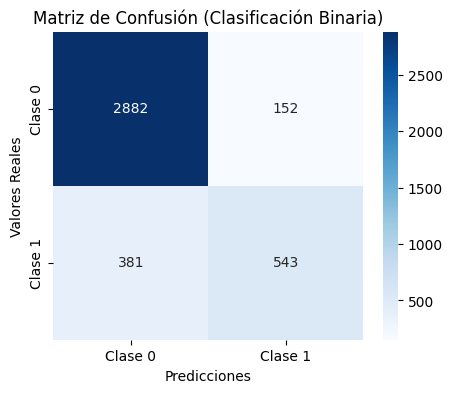

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Paso 1: Obtener predicciones
y_pred_probs = modelo_final.predict(x_final_test)  # Probabilidades (0 a 1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convertir a 0 o 1
y_true = t_final_test.flatten()  # Asegurar formato correcto

# Paso 2: Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
VN, FP, FN, VP = cm.ravel()

# Paso 3: Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Paso 4: Imprimir resultados
print(f"Verdaderos Negativos (VN): {VN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Verdaderos Positivos (VP): {VP}")
print("\nMétricas de Evaluación:")

print(classification_report(t_final_test, y_pred))
# Paso 5: Visualizar la matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Clase 0", "Clase 1"],
            yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión (Clasificación Binaria)")
plt.show()
